# 웹 크롤링

파이썬 과목 시험 : 공유 데이터 혹은 웹 크롤링 결과를 가지고 데이터 분석(전처리, 그래프 그리기)
7/3 까지 제출

1. 웹 크롤링 (화면 출력)
2. 정부 공유 데이터 csv 파일 데이터 분석(전처리, 그래프)

or

1. 웹 크롤링(csv 파일 저장) + 데이터 분석(전처리, 그래프)

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from pandas import json_normalize

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
# 15세 이상 1인당 알코올 소비량(전체) 데이터 페이지 가져오기
url = 'https://www.khepi.or.kr/acs/acsStat/result?menuId=MENU01189&tableGubun=DATA040202'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
print(soup)



<!-- 운영메뉴ID : MENU00144 개발메뉴ID : MENU00337 -->
<!-- 운영메뉴ID : MENU00145 개발메뉴ID : MENU00338 -->
<!-- 운영메뉴ID : MENU00146 개발메뉴ID : MENU00339 -->
<!-- 운영메뉴ID : MENU00147 개발메뉴ID : MENU00340 -->
<!-- 운영메뉴ID : MENU00148 개발메뉴ID : MENU00341 -->
<!-- 운영메뉴ID : MENU00498 개발메뉴ID : MENU00452 -->
<!-- 운영메뉴ID : MENU00151 개발메뉴ID : MENU00400 -->
<!-- 운영메뉴ID : MENU00510 개발메뉴ID : MENU00510 -->
<!-- 운영메뉴ID : MENU01257 개발메뉴ID : MENU01200 -->
<!-- 운영메뉴ID : MENU01258  개발메뉴ID : MENU01195 -->
<!-- 운영메뉴ID : MENU01259  개발메뉴ID : MENU01206 -->
<!-- 운영메뉴ID : MENU01255  개발메뉴ID : MENU01198 -->
<!-- 운영메뉴ID : MENU00516 개발메뉴ID : MENU00465 -->
<!-- 운영메뉴ID : MENU00517 개발메뉴ID : MENU00466 -->
<!-- 운영메뉴ID : MENU00235 개발메뉴ID : MENU00445 -->
<!-- 운영메뉴ID : MENU00642 개발메뉴ID : MENU00236-->
<!-- 운영메뉴ID : MENU00237 개발메뉴ID : MENU00447-->
<!-- 운영메뉴ID : MENU00061 개발메뉴ID : MENU00243-->
<!-- 운영메뉴ID : MENU00106 개발메뉴ID : MENU00281-->
<!-- 운영메뉴ID : MENU00156 개발메뉴ID : MENU00407-->
<!-- 운영메뉴ID : MENU00153 개발메뉴ID : MENU00402 -->
<!-- 운영메뉴ID : 

In [4]:
# 필요한 데이터가 있는 태그 가져오기
tag_script = soup.select('script')
data_tag = ""
for tag in tag_script:
    # print(tag.text.find("dataProvider"))
    if(tag.text.find("dataProvider") >= 0):
        data_tag = tag
        break

data_tag

<script>
var chart = AmCharts.makeChart("chart_div", {
  "type": "serial",
  "theme": "light",
  "legend": {
    "equalWidths": false,
    "position": "bottom",
    "valueAlign": "center",
    "valueWidth": 50
  },
  "dataProvider": [
	
		{
	    "year": "2005",
	    
	    	"총 소비량": 9.103
		    
		    	,
			
	    
	    	"탁주": 0.299
		    
		    	,
			
	    
	    	"약주": 0.127
		    
		    	,
			
	    
	    	"청주": 0.09
		    
		    	,
			
	    
	    	"맥주": 1.887
		    
		    	,
			
	    
	    	"과실주": 0.121
		    
		    	,
			
	    
	    	"증류식소주": 0.004
		    
		    	,
			
	    
	    	"희석식소주": 5.964
		    
		    	,
			
	    
	    	"위스키": 0.336
		    
		    	,
			
	    
	    	"브랜디": 0.014
		    
		    	,
			
	    
	    	"일반증류주": 0.095
		    
		    	,
			
	    
	    	"리큐르": 0.059
		    
		    	,
			
	    
	    	"기타주류": 0.017
		    
	    
	  	}
		
			,
		
	
		{
	    "year": "2006",
	    
	    	"총 소비량": 9.193
		    
		    	,
			
	    
	    	"탁주": 0.302
		    
		    	,
			
	    
	    	"약주": 0.1

In [5]:
# 태그 텍스트 내부의 json 포맷 영역 가져오기
data_str = data_tag.text
start = data_str.find("{")
# print(start)
end = data_str.find("});")
# print(end)

data = data_str[start:end + 1]
print(data)


{
  "type": "serial",
  "theme": "light",
  "legend": {
    "equalWidths": false,
    "position": "bottom",
    "valueAlign": "center",
    "valueWidth": 50
  },
  "dataProvider": [
	
		{
	    "year": "2005",
	    
	    	"총 소비량": 9.103
		    
		    	,
			
	    
	    	"탁주": 0.299
		    
		    	,
			
	    
	    	"약주": 0.127
		    
		    	,
			
	    
	    	"청주": 0.09
		    
		    	,
			
	    
	    	"맥주": 1.887
		    
		    	,
			
	    
	    	"과실주": 0.121
		    
		    	,
			
	    
	    	"증류식소주": 0.004
		    
		    	,
			
	    
	    	"희석식소주": 5.964
		    
		    	,
			
	    
	    	"위스키": 0.336
		    
		    	,
			
	    
	    	"브랜디": 0.014
		    
		    	,
			
	    
	    	"일반증류주": 0.095
		    
		    	,
			
	    
	    	"리큐르": 0.059
		    
		    	,
			
	    
	    	"기타주류": 0.017
		    
	    
	  	}
		
			,
		
	
		{
	    "year": "2006",
	    
	    	"총 소비량": 9.193
		    
		    	,
			
	    
	    	"탁주": 0.302
		    
		    	,
			
	    
	    	"약주": 0.121
		    
		    	,
			
	    
	    	"청주": 0.084
		    

In [6]:
# function 영역 삭제
f_start = data.find("function")
print(f_start)

import re
index_open = [m.start() for m in re.finditer('{', data[f_start:])]
print(index_open)

index_close = [m.start() for m in re.finditer('}', data[f_start:])]
print(index_close)

f_text = data[f_start:][:index_close[len(index_open)]]
f_text

data_removed = data[:f_start] + "\"\"" + data[f_start + index_close[len(index_open)]:]
data_removed

13812
[16, 100, 224]
[297, 373, 379, 383, 387]


'{\r\n  "type": "serial",\r\n  "theme": "light",\r\n  "legend": {\r\n    "equalWidths": false,\r\n    "position": "bottom",\r\n    "valueAlign": "center",\r\n    "valueWidth": 50\r\n  },\r\n  "dataProvider": [\r\n\t\r\n\t\t{\r\n\t    "year": "2005",\r\n\t    \r\n\t    \t"총 소비량": 9.103\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"탁주": 0.299\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"약주": 0.127\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"청주": 0.09\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"맥주": 1.887\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"과실주": 0.121\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"증류식소주": 0.004\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"희석식소주": 5.964\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"위스키": 0.336\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"브랜디": 0.014\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"일반증류주": 0.095\r\n

In [7]:
# json 으로 변환
data_json = json.loads(data_removed)
data_json

{'type': 'serial',
 'theme': 'light',
 'legend': {'equalWidths': False,
  'position': 'bottom',
  'valueAlign': 'center',
  'valueWidth': 50},
 'dataProvider': [{'year': '2005',
   '총 소비량': 9.103,
   '탁주': 0.299,
   '약주': 0.127,
   '청주': 0.09,
   '맥주': 1.887,
   '과실주': 0.121,
   '증류식소주': 0.004,
   '희석식소주': 5.964,
   '위스키': 0.336,
   '브랜디': 0.014,
   '일반증류주': 0.095,
   '리큐르': 0.059,
   '기타주류': 0.017},
  {'year': '2006',
   '총 소비량': 9.193,
   '탁주': 0.302,
   '약주': 0.121,
   '청주': 0.084,
   '맥주': 1.93,
   '과실주': 0.139,
   '증류식소주': 0.004,
   '희석식소주': 6.09,
   '위스키': 0.323,
   '브랜디': 0.018,
   '일반증류주': 0.095,
   '리큐르': 0.065,
   '기타주류': 0.023},
  {'year': '2007',
   '총 소비량': 9.268,
   '탁주': 0.302,
   '약주': 0.092,
   '청주': 0.081,
   '맥주': 2.007,
   '과실주': 0.185,
   '증류식소주': 0.005,
   '희석식소주': 6.037,
   '위스키': 0.351,
   '브랜디': 0.019,
   '일반증류주': 0.104,
   '리큐르': 0.059,
   '기타주류': 0.024},
  {'year': '2008',
   '총 소비량': 9.398,
   '탁주': 0.304,
   '약주': 0.075,
   '청주': 0.076,
   '맥주': 2.052,
   '

In [8]:
# json -> DataFrame 변환

df = json_normalize(data_json['dataProvider']) 
print(df)

    year  총 소비량     탁주     약주     청주     맥주    과실주  증류식소주  희석식소주    위스키  \
0   2005  9.103  0.299  0.127  0.090  1.887  0.121  0.004  5.964  0.336   
1   2006  9.193  0.302  0.121  0.084  1.930  0.139  0.004  6.090  0.323   
2   2007  9.268  0.302  0.092  0.081  2.007  0.185  0.005  6.037  0.351   
3   2008  9.398  0.304  0.075  0.076  2.052  0.167  0.005  6.199  0.309   
4   2009  8.841  0.444  0.060  0.081  1.970  0.135  0.007  5.671  0.254   
5   2010  8.914  0.694  0.051  0.082  1.903  0.137  0.007  5.609  0.255   
6   2011  8.858  0.761  0.050  0.085  1.939  0.133  0.006  5.485  0.224   
7   2012  8.989  0.736  0.043  0.090  1.995  0.132  0.006  5.593  0.194   
8   2013  8.690  0.693  0.037  0.094  2.024  0.146  0.007  5.278  0.174   
9   2014  8.921  0.693  0.031  0.086  2.014  0.149  0.007  5.515  0.168   
10  2015  9.094  0.662  0.029  0.081  2.026  0.170  0.008  5.445  0.161   
11  2016  8.686  0.630  0.029  0.083  1.998  0.153  0.010  5.265  0.152   
12  2017  8.652  0.641  0

In [9]:
# CSV 저장, 로드
filename = "alcohol.csv"
df.to_csv(filename, index=False)

df_file = pd.read_csv(filename)
df_file

,year,총 소비량,탁주,약주,청주,맥주,과실주,증류식소주,희석식소주,위스키,브랜디,일반증류주,리큐르,기타주류
0,2005,9.103,0.299,0.127,0.090,1.887,0.121,0.004,5.964,0.336,0.014,0.095,0.059,0.017
1,2006,9.193,0.302,0.121,0.084,1.930,0.139,0.004,6.090,0.323,0.018,0.095,0.065,0.023
2,2007,9.268,0.302,0.092,0.081,2.007,0.185,0.005,6.037,0.351,0.019,0.104,0.059,0.024
3,2008,9.398,0.304,0.075,0.076,2.052,0.167,0.005,6.199,0.309,0.016,0.103,0.063,0.028
4,2009,8.841,0.444,0.060,0.081,1.970,0.135,0.007,5.671,0.254,0.014,0.132,0.048,0.025
5,2010,8.914,0.694,0.051,0.082,1.903,0.137,0.007,5.609,0.255,0.013,0.091,0.041,0.032
6,2011,8.858,0.761,0.050,0.085,1.939,0.133,0.006,5.485,0.224,0.011,0.100,0.039,0.026
7,2012,8.989,0.736,0.043,0.090,1.995,0.132,0.006,5.593,0.194,0.009,0.111,0.054,0.026
8,2013,8.690,0.693,0.037,0.094,2.024,0.146,0.007,5.278,0.174,0.008,0.142,0.056,0.031
9,2014,8.921,0.693,0.031,0.086,2.014,0.149,0.007,5.515,0.168,0.011,0.155,0.055,0.037


In [10]:
# 필요 없는 컬럼 제거
df2 = df.loc[:, df.columns != '총 소비량']
df2

,year,탁주,약주,청주,맥주,과실주,증류식소주,희석식소주,위스키,브랜디,일반증류주,리큐르,기타주류
0,2005,0.299,0.127,0.090,1.887,0.121,0.004,5.964,0.336,0.014,0.095,0.059,0.017
1,2006,0.302,0.121,0.084,1.930,0.139,0.004,6.090,0.323,0.018,0.095,0.065,0.023
2,2007,0.302,0.092,0.081,2.007,0.185,0.005,6.037,0.351,0.019,0.104,0.059,0.024
3,2008,0.304,0.075,0.076,2.052,0.167,0.005,6.199,0.309,0.016,0.103,0.063,0.028
4,2009,0.444,0.060,0.081,1.970,0.135,0.007,5.671,0.254,0.014,0.132,0.048,0.025
5,2010,0.694,0.051,0.082,1.903,0.137,0.007,5.609,0.255,0.013,0.091,0.041,0.032
6,2011,0.761,0.050,0.085,1.939,0.133,0.006,5.485,0.224,0.011,0.100,0.039,0.026
7,2012,0.736,0.043,0.090,1.995,0.132,0.006,5.593,0.194,0.009,0.111,0.054,0.026
8,2013,0.693,0.037,0.094,2.024,0.146,0.007,5.278,0.174,0.008,0.142,0.056,0.031
9,2014,0.693,0.031,0.086,2.014,0.149,0.007,5.515,0.168,0.011,0.155,0.055,0.037


<Axes: title={'center': '주류 소비량'}, xlabel='year'>

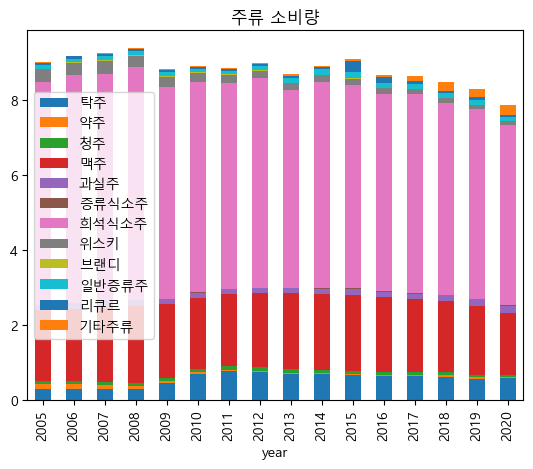

In [11]:
df2.plot.bar(x='year', stacked=True, title='주류 소비량')

In [12]:
# 알코올 조세 및 가격 데이터 페이지 가져오기
url = 'https://www.khepi.or.kr/acs/acsStat/result?menuId=MENU01165&tableGubun=DATA050102'
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
print(soup)



<!-- 운영메뉴ID : MENU00144 개발메뉴ID : MENU00337 -->
<!-- 운영메뉴ID : MENU00145 개발메뉴ID : MENU00338 -->
<!-- 운영메뉴ID : MENU00146 개발메뉴ID : MENU00339 -->
<!-- 운영메뉴ID : MENU00147 개발메뉴ID : MENU00340 -->
<!-- 운영메뉴ID : MENU00148 개발메뉴ID : MENU00341 -->
<!-- 운영메뉴ID : MENU00498 개발메뉴ID : MENU00452 -->
<!-- 운영메뉴ID : MENU00151 개발메뉴ID : MENU00400 -->
<!-- 운영메뉴ID : MENU00510 개발메뉴ID : MENU00510 -->
<!-- 운영메뉴ID : MENU01257 개발메뉴ID : MENU01200 -->
<!-- 운영메뉴ID : MENU01258  개발메뉴ID : MENU01195 -->
<!-- 운영메뉴ID : MENU01259  개발메뉴ID : MENU01206 -->
<!-- 운영메뉴ID : MENU01255  개발메뉴ID : MENU01198 -->
<!-- 운영메뉴ID : MENU00516 개발메뉴ID : MENU00465 -->
<!-- 운영메뉴ID : MENU00517 개발메뉴ID : MENU00466 -->
<!-- 운영메뉴ID : MENU00235 개발메뉴ID : MENU00445 -->
<!-- 운영메뉴ID : MENU00642 개발메뉴ID : MENU00236-->
<!-- 운영메뉴ID : MENU00237 개발메뉴ID : MENU00447-->
<!-- 운영메뉴ID : MENU00061 개발메뉴ID : MENU00243-->
<!-- 운영메뉴ID : MENU00106 개발메뉴ID : MENU00281-->
<!-- 운영메뉴ID : MENU00156 개발메뉴ID : MENU00407-->
<!-- 운영메뉴ID : MENU00153 개발메뉴ID : MENU00402 -->
<!-- 운영메뉴ID : 

In [13]:
# 필요한 데이터가 있는 태그 가져오기
tag_script = soup.select('script')
data_tag = ""
for tag in tag_script:
    # print(tag.text.find("dataProvider"))
    if(tag.text.find("dataProvider") >= 0):
        data_tag = tag
        break

data_tag

<script>
var chart = AmCharts.makeChart("chart_div", {
  "type": "serial",
  "theme": "light",
  "legend": {
    "equalWidths": false,
    "position": "bottom",
    "valueAlign": "center",
    "valueWidth": 50
  },
  "dataProvider": [
	
		{
	    "year": "2005",
	    
	    	"합계": 2568689
		    
		    	,
			
	    
	    	"탁주": 6648
		    
		    	,
			
	    
	    	"약주": 47317
		    
		    	,
			
	    
	    	"청주": 23188
		    
		    	,
			
	    
	    	"맥주": 1267590
		    
		    	,
			
	    
	    	"과실주": 47088
		    
		    	,
			
	    
	    	"증류식 소주": 2097
		    
		    	,
			
	    
	    	"희석식 소주": 816308
		    
		    	,
			
	    
	    	"위스키": 316081
		    
		    	,
			
	    
	    	"브랜디": 11259
		    
		    	,
			
	    
	    	"일반 증류주": 11110
		    
		    	,
			
	    
	    	"리큐르": 16259
		    
		    	,
			
	    
	    	"기타 주류": 1250
		    
		    	,
			
	    
	    	"주정": 2494
		    
	    
	  	}
		
			,
		
	
		{
	    "year": "2006",
	    
	    	"합계": 2490665
		    
		    	,
			
	    
	    	"탁주": 

In [14]:
# 태그 텍스트 내부의 json 포맷 영역 가져오기
data_str = data_tag.text
start = data_str.find("{")
# print(start)
end = data_str.find("});")
# print(end)

data = data_str[start:end + 1]
print(data)


{
  "type": "serial",
  "theme": "light",
  "legend": {
    "equalWidths": false,
    "position": "bottom",
    "valueAlign": "center",
    "valueWidth": 50
  },
  "dataProvider": [
	
		{
	    "year": "2005",
	    
	    	"합계": 2568689
		    
		    	,
			
	    
	    	"탁주": 6648
		    
		    	,
			
	    
	    	"약주": 47317
		    
		    	,
			
	    
	    	"청주": 23188
		    
		    	,
			
	    
	    	"맥주": 1267590
		    
		    	,
			
	    
	    	"과실주": 47088
		    
		    	,
			
	    
	    	"증류식 소주": 2097
		    
		    	,
			
	    
	    	"희석식 소주": 816308
		    
		    	,
			
	    
	    	"위스키": 316081
		    
		    	,
			
	    
	    	"브랜디": 11259
		    
		    	,
			
	    
	    	"일반 증류주": 11110
		    
		    	,
			
	    
	    	"리큐르": 16259
		    
		    	,
			
	    
	    	"기타 주류": 1250
		    
		    	,
			
	    
	    	"주정": 2494
		    
	    
	  	}
		
			,
		
	
		{
	    "year": "2006",
	    
	    	"합계": 2490665
		    
		    	,
			
	    
	    	"탁주": 6799
		    
		    	,
			
	    
	    	"약주": 42892
		  

In [15]:
# function 영역 삭제
f_start = data.find("function")
print(f_start)

import re
index_open = [m.start() for m in re.finditer('{', data[f_start:])]
print(index_open)

index_close = [m.start() for m in re.finditer('}', data[f_start:])]
print(index_close)

f_text = data[f_start:][:index_close[len(index_open)]]
f_text

data_removed = data[:f_start] + "\"\"" + data[f_start + index_close[len(index_open)]:]
data_removed

14836
[16, 100, 224]
[297, 373, 379, 383, 387]


'{\r\n  "type": "serial",\r\n  "theme": "light",\r\n  "legend": {\r\n    "equalWidths": false,\r\n    "position": "bottom",\r\n    "valueAlign": "center",\r\n    "valueWidth": 50\r\n  },\r\n  "dataProvider": [\r\n\t\r\n\t\t{\r\n\t    "year": "2005",\r\n\t    \r\n\t    \t"합계": 2568689\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"탁주": 6648\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"약주": 47317\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"청주": 23188\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"맥주": 1267590\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"과실주": 47088\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"증류식 소주": 2097\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"희석식 소주": 816308\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"위스키": 316081\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"브랜디": 11259\r\n\t\t    \r\n\t\t    \t,\r\n\t\t\t\r\n\t    \r\n\t    \t"일반 증류주": 1111

In [16]:
# json 으로 변환
data_json = json.loads(data_removed)
data_json

{'type': 'serial',
 'theme': 'light',
 'legend': {'equalWidths': False,
  'position': 'bottom',
  'valueAlign': 'center',
  'valueWidth': 50},
 'dataProvider': [{'year': '2005',
   '합계': 2568689,
   '탁주': 6648,
   '약주': 47317,
   '청주': 23188,
   '맥주': 1267590,
   '과실주': 47088,
   '증류식 소주': 2097,
   '희석식 소주': 816308,
   '위스키': 316081,
   '브랜디': 11259,
   '일반 증류주': 11110,
   '리큐르': 16259,
   '기타 주류': 1250,
   '주정': 2494},
  {'year': '2006',
   '합계': 2490665,
   '탁주': 6799,
   '약주': 42892,
   '청주': 21782,
   '맥주': 1152754,
   '과실주': 55419,
   '증류식 소주': 2037,
   '희석식 소주': 866154,
   '위스키': 302794,
   '브랜디': 10167,
   '일반 증류주': 11432,
   '리큐르': 14070,
   '기타 주류': 1821,
   '주정': 2544},
  {'year': '2007',
   '합계': 2322210,
   '탁주': 7138,
   '약주': 34922,
   '청주': 20388,
   '맥주': 1124189,
   '과실주': 32623,
   '증류식 소주': 2403,
   '희석식 소주': 907325,
   '위스키': 177041,
   '브랜디': 19,
   '일반 증류주': 7556,
   '리큐르': 4545,
   '기타 주류': 1349,
   '주정': 2712},
  {'year': '2008',
   '합계': 2718171,
   '탁주': 7350,

In [17]:
# json -> DataFrame 변환

df_tax = json_normalize(data_json['dataProvider']) 
print(df_tax)

    year       합계     탁주     약주     청주       맥주     과실주  증류식 소주   희석식 소주  \
0   2005  2568689   6648  47317  23188  1267590   47088    2097   816308   
1   2006  2490665   6799  42892  21782  1152754   55419    2037   866154   
2   2007  2322210   7138  34922  20388  1124189   32623    2403   907325   
3   2008  2718171   7350  29014  21505  1244431   91640    2670   972348   
4   2009  2655742  11301  24290  24426  1264651   75526    2751   957026   
5   2010  2702077  19448  21175  26001  1289116   71147    3527   968083   
6   2011  2738119  21971  21908  27460  1346794   73523    3281   968300   
7   2012  2839019  21444  18464  27486  1430242   72473    3387  1011468   
8   2013  2978129  20345  17119  29600  1544699   81381    4015  1052401   
9   2014  3092694  20580  14667  29404  1568691   83207    4857  1138898   
10  2015  3226966  20204  13557  28051  1608517   87680    6573  1171309   
11  2016  3237543  19504  13475  29432  1602639   96572    8402  1212082   
12  2017  32

In [18]:
# CSV 저장, 로드
filename = "tax.csv"
df_tax.to_csv(filename, index=False)

df_tax_file = pd.read_csv(filename)
df_tax_file

,year,합계,탁주,약주,청주,맥주,과실주,증류식 소주,희석식 소주,위스키,브랜디,일반 증류주,리큐르,기타 주류,주정
0,2005,2568689,6648,47317,23188,1267590,47088,2097,816308,316081,11259,11110,16259,1250,2494
1,2006,2490665,6799,42892,21782,1152754,55419,2037,866154,302794,10167,11432,14070,1821,2544
2,2007,2322210,7138,34922,20388,1124189,32623,2403,907325,177041,19,7556,4545,1349,2712
3,2008,2718171,7350,29014,21505,1244431,91640,2670,972348,306370,9751,15031,13372,2027,2662
4,2009,2655742,11301,24290,24426,1264651,75526,2751,957026,253706,8193,16611,12377,2149,2735
5,2010,2702077,19448,21175,26001,1289116,71147,3527,968083,264510,8501,14647,10566,2737,2619
6,2011,2738119,21971,21908,27460,1346794,73523,3281,968300,234546,7112,16619,11404,2747,2454
7,2012,2839019,21444,18464,27486,1430242,72473,3387,1011468,204417,5309,20776,17968,3174,2411
8,2013,2978129,20345,17119,29600,1544699,81381,4015,1052401,171016,5640,25864,19981,3742,2326
9,2014,3092694,20580,14667,29404,1568691,83207,4857,1138898,172174,4702,28889,19453,4814,2358


In [28]:
# 필요 없는 컬럼 제거
df_tax2 = df_tax.loc[:, df_tax.columns != '합계']
df_tax2 = df_tax2.loc[:, df_tax2.columns != '주정']
df_tax2

,year,탁주,약주,청주,맥주,과실주,증류식 소주,희석식 소주,위스키,브랜디,일반 증류주,리큐르,기타 주류
0,2005,6648,47317,23188,1267590,47088,2097,816308,316081,11259,11110,16259,1250
1,2006,6799,42892,21782,1152754,55419,2037,866154,302794,10167,11432,14070,1821
2,2007,7138,34922,20388,1124189,32623,2403,907325,177041,19,7556,4545,1349
3,2008,7350,29014,21505,1244431,91640,2670,972348,306370,9751,15031,13372,2027
4,2009,11301,24290,24426,1264651,75526,2751,957026,253706,8193,16611,12377,2149
5,2010,19448,21175,26001,1289116,71147,3527,968083,264510,8501,14647,10566,2737
6,2011,21971,21908,27460,1346794,73523,3281,968300,234546,7112,16619,11404,2747
7,2012,21444,18464,27486,1430242,72473,3387,1011468,204417,5309,20776,17968,3174
8,2013,20345,17119,29600,1544699,81381,4015,1052401,171016,5640,25864,19981,3742
9,2014,20580,14667,29404,1568691,83207,4857,1138898,172174,4702,28889,19453,4814


<Axes: title={'center': '주류 부과세'}, xlabel='year'>

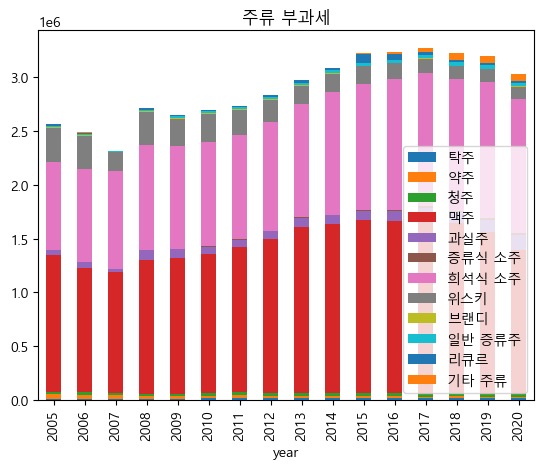

In [30]:
df_tax2.plot.bar(x='year', stacked=True, title='주류 부과세')

In [20]:
# 소비량 데이터 컬럼 이름 변경
print(df2.columns)

new_columns = []

for i in range(len(df2.columns)) :
    if df2.columns[i] != "year":
        new_columns.append(str(df2.columns[i]).replace(" ", "") + "_소비량")
    else:
        new_columns.append(df2.columns[i])

df2.columns = new_columns
print(df2.columns)

Index(['year', '탁주', '약주', '청주', '맥주', '과실주', '증류식소주', '희석식소주', '위스키', '브랜디',
       '일반증류주', '리큐르', '기타주류'],
      dtype='object')
Index(['year', '탁주_소비량', '약주_소비량', '청주_소비량', '맥주_소비량', '과실주_소비량', '증류식소주_소비량',
       '희석식소주_소비량', '위스키_소비량', '브랜디_소비량', '일반증류주_소비량', '리큐르_소비량', '기타주류_소비량'],
      dtype='object')


In [21]:
# 부과세 데이터 컬럼 이름 변경
print(df2.columns)
print(df_tax2.columns)

new_columns = []

for i in range(len(df_tax2.columns)) :
    if df_tax2.columns[i] != "year":
        new_columns.append(str(df_tax2.columns[i]).replace(" ", "") + "_부과세")
    else:
        new_columns.append(df_tax2.columns[i])

df_tax2.columns = new_columns
print(df_tax2.columns)

Index(['year', '탁주_소비량', '약주_소비량', '청주_소비량', '맥주_소비량', '과실주_소비량', '증류식소주_소비량',
       '희석식소주_소비량', '위스키_소비량', '브랜디_소비량', '일반증류주_소비량', '리큐르_소비량', '기타주류_소비량'],
      dtype='object')
Index(['year', '탁주', '약주', '청주', '맥주', '과실주', '증류식 소주', '희석식 소주', '위스키', '브랜디',
       '일반 증류주', '리큐르', '기타 주류'],
      dtype='object')
Index(['year', '탁주_부과세', '약주_부과세', '청주_부과세', '맥주_부과세', '과실주_부과세', '증류식소주_부과세',
       '희석식소주_부과세', '위스키_부과세', '브랜디_부과세', '일반증류주_부과세', '리큐르_부과세', '기타주류_부과세'],
      dtype='object')


In [22]:
# 소비량 데이터와 부과세 데이터 병합
df3=pd.merge(df2,df_tax2, on='year')
df3
print(df3.columns)

Index(['year', '탁주_소비량', '약주_소비량', '청주_소비량', '맥주_소비량', '과실주_소비량', '증류식소주_소비량',
       '희석식소주_소비량', '위스키_소비량', '브랜디_소비량', '일반증류주_소비량', '리큐르_소비량', '기타주류_소비량',
       '탁주_부과세', '약주_부과세', '청주_부과세', '맥주_부과세', '과실주_부과세', '증류식소주_부과세',
       '희석식소주_부과세', '위스키_부과세', '브랜디_부과세', '일반증류주_부과세', '리큐르_부과세', '기타주류_부과세'],
      dtype='object')


In [23]:
# ! pip install Jinja2

In [24]:
# year 데이터 타입 변경
df3['year'] = df3['year'].astype(int)

In [25]:
# 데이터 정규화
normalized_df3=(df3-df3.mean())/df3.std()

In [26]:
# 주류의 소비량과 부과세의 상관 관계 분석
corr_normalized_df3_temp = normalized_df3.corr()

corr_normalized_df3 = corr_normalized_df3_temp.loc[df2.columns, df_tax2.columns]
corr_normalized_df3.style.background_gradient(cmap='coolwarm')

,year,탁주_부과세,약주_부과세,청주_부과세,맥주_부과세,과실주_부과세,증류식소주_부과세,희석식소주_부과세,위스키_부과세,브랜디_부과세,일반증류주_부과세,리큐르_부과세,기타주류_부과세
year,1.000000,0.751935,-0.913507,0.788586,0.763812,0.868682,0.921706,0.978246,-0.899344,-0.453950,0.936887,0.418260,0.819991
탁주_소비량,0.630878,0.984306,-0.795121,0.856842,0.709876,0.424555,0.340482,0.556349,-0.539088,-0.314438,0.640643,0.311189,0.195955
약주_소비량,-0.895005,-0.880885,0.997743,-0.832419,-0.788454,-0.757175,-0.679929,-0.879415,0.805742,0.493409,-0.868886,-0.411662,-0.532391
청주_소비량,-0.137726,0.205087,0.089155,0.391539,0.351935,-0.399496,-0.278338,-0.167481,0.030039,0.009957,0.048497,-0.043330,-0.266236
맥주_소비량,-0.413709,-0.104506,0.152734,-0.043901,0.126526,-0.533606,-0.634874,-0.298034,0.275079,-0.092844,-0.189272,0.189696,-0.706728
과실주_소비량,0.446467,0.001200,-0.328123,-0.106953,-0.039789,0.507710,0.536548,0.458651,-0.517125,-0.508989,0.248300,0.168579,0.504418
증류식소주_소비량,0.911628,0.520095,-0.751739,0.608827,0.592501,0.814006,0.972024,0.898263,-0.819277,-0.351702,0.802603,0.234589,0.929342
희석식소주_소비량,-0.935165,-0.789626,0.849127,-0.810815,-0.688512,-0.800924,-0.854091,-0.857747,0.840979,0.372419,-0.851141,-0.315027,-0.772080
위스키_소비량,-0.977022,-0.826714,0.924134,-0.861308,-0.809608,-0.854694,-0.848534,-0.938385,0.845890,0.371066,-0.955717,-0.434394,-0.735271
브랜디_소비량,-0.931387,-0.799078,0.850711,-0.871913,-0.849518,-0.789353,-0.831959,-0.889680,0.792634,0.287803,-0.924726,-0.488784,-0.721173
